# Introduction

This project set out to decide the best neighborhood in Pittsburgh by combining three metrics: how many acres of park a neighborhood had, how many public art installations it had, and how good its parking was (in terms of parking cost and availability). We generally felt confident in our metrics, and decided on them fairly quickly. Each of our metrics represents an important aspect of life in any neighborhood: healthy access to nature, being able to see human creativity, and, of course, an appropriate transportation situation. Some variation in how to go about representing the best among these metrics was deliberated, though. For example, we considered implementing a graph algorithm to determine *distance* to parks instead of acres of parks within a neighborhood, but eventually scrapped that idea. Also, we had to come up with a way to normalize all of our numerical data in a way that could give us a consolidated series of data that we could analyze for the single best (discussed in the section below). Finally, though, we did determine what we set out to solve: the best neighborhoods in Pittsburgh.

# The (Combined) Metric

To decide the best neighborhood in Pittsburgh, we combined our three individual metrics into one by looking for a neighborhood that covered all of our individual metrics.

The best neighborhood had to be among the neighborhoods with the most acres of park, the most public art installations, and the best parking rates and number of available parking locations.

No neighborhood won all three metrics in first place, so we decided to reduce the data by dividing our outcomes by the max values of each, so that all of our numbers would be reduced to percentages of the highest value. That way, we could combine all of our data without having to worry about the differences in data sizes. Then we added these normalized values up and picked the neighborhood that had the highest sum of these values. 

# The Best Neighborhood

Drumroll please ... 🥁

**Squirrel Hill!**

Below is some code to visualize the data that went into making this decision:

neighborhood
Squirrel Hill South    1.000000
Highland Park          0.371571
Perry North            0.252426
Beltzhoover            0.077755
South Side Slopes      0.069117
Name: acreage, dtype: float64


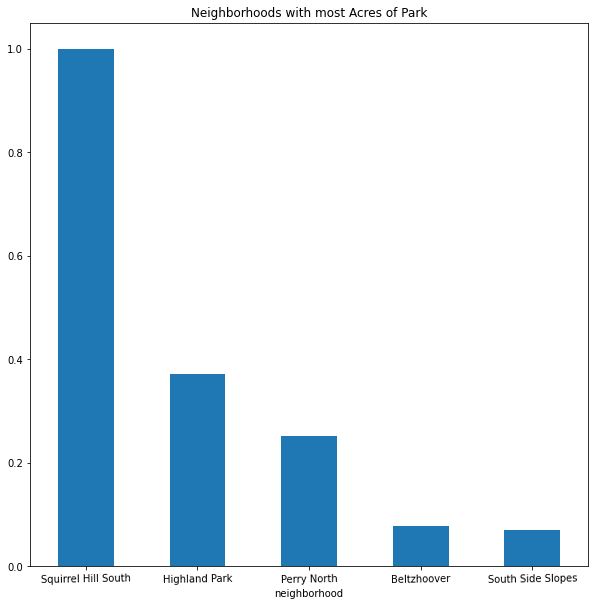

In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
%matplotlib inline
%store -r reduced_acreage
print(reduced_acreage.head(5))
reduced_acreage.head(5).plot(kind='bar', title="Neighborhoods with most Acres of Park", rot=True, figsize=(10,10))

neighborhood
Central Business District    1.000000
Squirrel Hill South          0.740741
Allegheny Center             0.666667
Highland Park                0.370370
South Side Flats             0.333333
dtype: float64


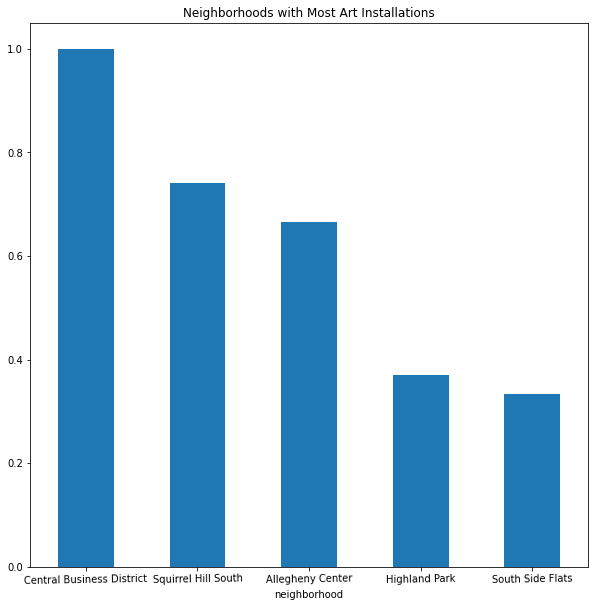

In [49]:
%store -r percent_art
print(percent_art.head(5))
percent_art.head(5).plot(kind='bar', title="Neighborhoods with Most Art Installations", rot=True, figsize=(10,10))

node
South Side       0.833333
Squirell Hill    0.816514
Uptown           0.775229
East Liberty     0.770642
Strip Distri*    0.729358
Name: combined, dtype: float64


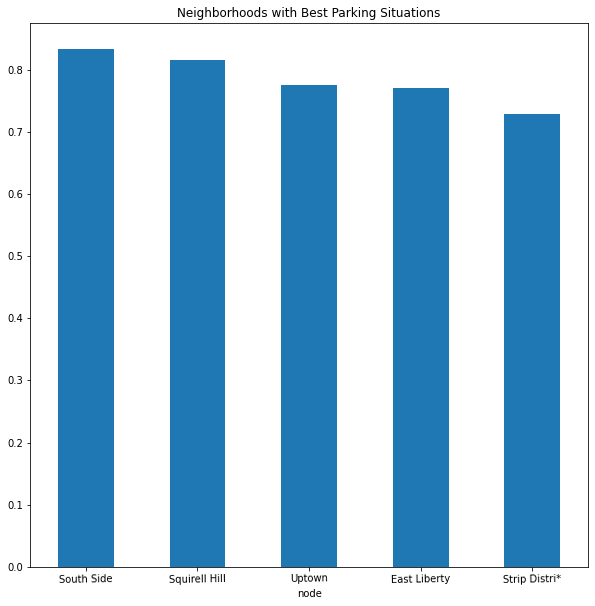

In [50]:
%store -r best_parking

# Combine the parking rates and parking locations data and average, row-wise
best_parking['combined'] = best_parking[['rates', 'count']].astype(float).mean(axis=1)

print(best_parking['combined'].sort_values(ascending=False).head(5))
best_parking['combined'].sort_values(ascending=False).head(5).plot(kind='bar', title="Neighborhoods with Best Parking Situations", rot=True, figsize=(10,10))

Squirrel Hill South          1.740741
Central Business District    1.008461
South Side                   0.833333
East Liberty                 0.819641
Squirell Hill                0.816514
dtype: float64


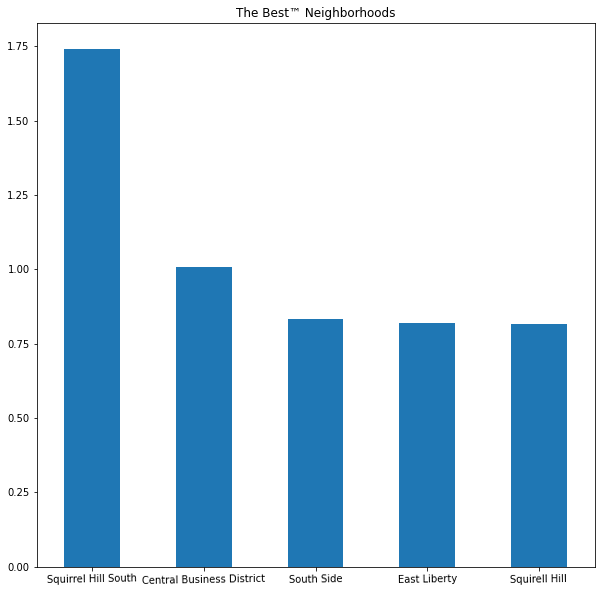

In [51]:
best_neighborhoods = (reduced_acreage.add(percent_art, fill_value=0).add(best_parking['combined'], fill_value=0)).sort_values(ascending=False).head(5)
print(best_neighborhoods)
best_neighborhoods.plot(kind='bar', title="The Best™ Neighborhoods", rot=True, figsize=(10,10))

Note that due to a naming convention difference across a couple of datasets, Squirrel Hill was separated into two separately named neighborhoods here. But, thankfully, it doesn't affect the outcome, because adding the values of the different variations of Squirrel Hill together still results in a clear winner. 

# Conclusions

 *Gavin's response:* Personally, I agreed with the outcome of this analysis. I remember spending a lot of time in Squirrel Hill (namely the parks, of course!) as a kid, and I think that having access to nature like that is good for people, especially young, developing people and families. 